*Not investment advice

## **Terminology:**

> **Overfitting** - *when decision trees in a ML model learn too much from training data and fail to generalize to new data.* \
> **Decision Trees** - *Recursion in a way. A tree of decisions made on previous questions.*

In [1]:
import yfinance as yf

In [2]:
sp500 = yf.Ticker("^GSPC")

In [3]:
sp500 = sp500.history(period="max")

In [4]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-19 00:00:00-05:00,4796.279785,4842.069824,4785.870117,4839.810059,4287200000,0.0,0.0
2024-01-22 00:00:00-05:00,4853.419922,4868.410156,4844.049805,4850.430176,4297610000,0.0,0.0
2024-01-23 00:00:00-05:00,4856.799805,4866.479980,4844.370117,4864.600098,3912800000,0.0,0.0


In [5]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-01-11 00:00:00-05:00', '2024-01-12 00:00:00-05:00',
               '2024-01-16 00:00:00-05:00', '2024-01-17 00:00:00-05:00',
               '2024-01-18 00:00:00-05:00', '2024-01-19 00:00:00-05:00',
               '2024-01-22 00:00:00-05:00', '2024-01-23 00:00:00-05:00',
               '2024-01-24 00:00:00-05:00', '2024-01-25 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24132, freq=None)

<Axes: xlabel='Date'>

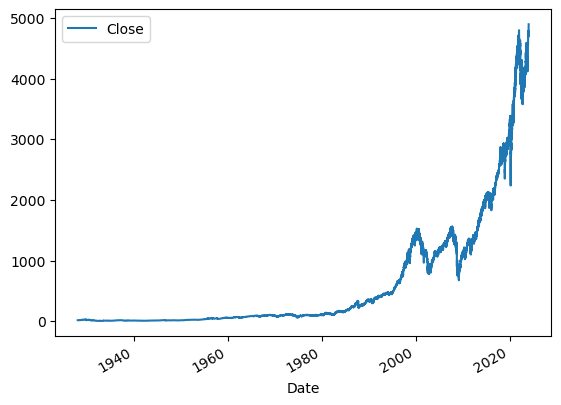

In [6]:
sp500.plot.line(y="Close", use_index=True)

In [7]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [8]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [9]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-01-19 00:00:00-05:00,4796.279785,4842.069824,4785.870117,4839.810059,4287200000,4850.430176
2024-01-22 00:00:00-05:00,4853.419922,4868.410156,4844.049805,4850.430176,4297610000,4864.600098
2024-01-23 00:00:00-05:00,4856.799805,4866.479980,4844.370117,4864.600098,3912800000,4868.549805


In [10]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [11]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-01-19 00:00:00-05:00,4796.279785,4842.069824,4785.870117,4839.810059,4287200000,4850.430176,1
2024-01-22 00:00:00-05:00,4853.419922,4868.410156,4844.049805,4850.430176,4297610000,4864.600098,1
2024-01-23 00:00:00-05:00,4856.799805,4866.479980,4844.370117,4864.600098,3912800000,4868.549805,1


In [12]:
sp500 = sp500.loc["1990-01-01":].copy()

In [13]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-01-19 00:00:00-05:00,4796.279785,4842.069824,4785.870117,4839.810059,4287200000,4850.430176,1
2024-01-22 00:00:00-05:00,4853.419922,4868.410156,4844.049805,4850.430176,4297610000,4864.600098,1
2024-01-23 00:00:00-05:00,4856.799805,4866.479980,4844.370117,4864.600098,3912800000,4868.549805,1


#### RandomForestClassifier model

In [14]:
#Prefered for a few reasons:
"""
1. Work by training a bunch of individual decicions trees with random params and then avg results from those decision trees.
   Makes it resistant to overfitting, still can but harder.
2. Relatively Quick
3. Pickup non-linear tendencies in data, stock prices are usually non-linear. If you can find a linear relationship u rich af
"""
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestClassifier

#n_estimators: number of individual decision trees to train
#min_samples_split: protect against overfitting, decision trees have tendencies to overfit if they build the tree too deeply. Makes it less accurate model but also less overfitting.
#random_state: If we re-run the model more than once it will produce the same results
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

"""
We have time-series data and cant use cross validation.If we do use cross validation the results 
will look really good when training because we are using future data to predict the past. 
Can't work in real life because we don't know future. Causes leakage into the model.
It's like training the model to predict tomorrow after giving it 30d in future prices. It shouldn't need that to predict.
"""
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"]) #Train the model using the predictors columns in order to predict the Target (Going up or down)

RandomForestClassifier(min_samples_split=100, random_state=1)

In [15]:
#Measure how accurate the model is
from sklearn.metrics import precision_score
import pandas as pd

preds = model.predict(test[predictors])

In [16]:
preds = pd.Series(preds, index=test.index)

In [17]:
precision_score(test["Target"], preds)

0.54

In [18]:
combined = pd.concat([test["Target"], preds], axis=1)

<Axes: xlabel='Date'>

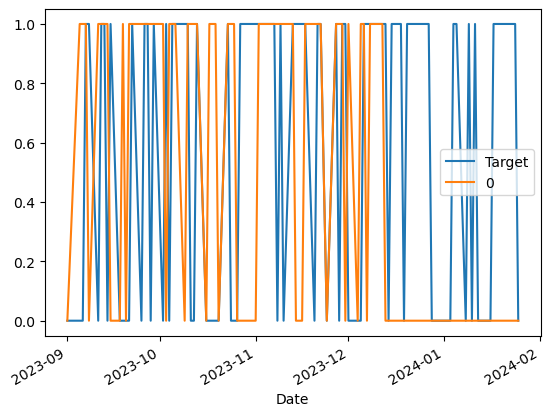

In [20]:
combined.plot()

____________________________________

### Time To Become More Robust

____________________________________

In [21]:
#Enable backtesting with more data
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"]) #fitting model with training predictors and target
    preds = model.predict(test[predictors]) #generating predictions
    preds = pd.Series(preds, index=test.index, name="Predictions") #combining model into a series
    combined = pd.concat([test["Target"], preds], axis=1)

    return combined

In [22]:
#Backtesting function
#start value: every trading year has around 250 days, thus we take 10 years of data to train with
#step value: basically training model for every year
#GOAL: train first 10 years to predict 11th year, then train first 11 years to predict 12th year and so on
def backtest(data, model, predictors, start=2500, step=250): 
    all_predictions = []

    for i in range(start, data.shape[0], step): #loop through data year by year
        train = data.iloc[0:i].copy() #training set prior to current year
        test = data.iloc[i:(i+step)].copy() #test set current year
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [23]:
predictions = backtest(sp500, model, predictors)

In [25]:
predictions["Predictions"].value_counts() #0 means going down, 1 means market predicted to go up and number of days

Predictions
0    3486
1    2596
Name: count, dtype: int64

In [27]:
precision_score(predictions["Target"], predictions["Predictions"]) #Accuracy of when we'd say it would go up

0.5288906009244992

In [29]:
predictions["Target"].value_counts() / predictions.shape[0] #Percent of days going up or down

Target
1    0.534693
0    0.465307
Name: count, dtype: float64

___________

### Time to add more predictors

_______

In [30]:
#Creating variety of rolling avgs, then find ratio between todays closing price and these periods
horizons = [2,3,60,250,1000] #Days to calculate rolling means, mean close price in the last 2, 5, 60... days
new_predictors = []

for horizon in horizons:
    rolling_avgs = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_avgs["Close"]

    trend_column = f"Trend_{horizon}" #of days price went up
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]

In [32]:
sp500 = sp500.dropna()

In [34]:
 sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_3,Trend_3,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.997480,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.996347,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,1.001282,1.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.005447,2.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.001419,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-18 00:00:00-05:00,4760.100098,4785.790039,4740.569824,4780.939941,4019000000,4839.810059,1,1.004383,1.0,1.003968,1.0,1.048389,38.0,1.105719,136.0,1.198652,527.0
2024-01-19 00:00:00-05:00,4796.279785,4842.069824,4785.870117,4839.810059,4287200000,4850.430176,1,1.006119,2.0,1.011105,2.0,1.058888,39.0,1.118437,136.0,1.212935,528.0
2024-01-22 00:00:00-05:00,4853.419922,4868.410156,4844.049805,4850.430176,4297610000,4864.600098,1,1.001096,2.0,1.005536,3.0,1.058885,39.0,1.120031,136.0,1.215119,528.0


_______

# Lets Improve Our Model

_______

In [41]:
#adding more decision trees to train (n_estimators)
#reducing min_samples_split: less protection for overfitting but more accurate model
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [40]:
#Enable backtesting with more data
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"]) #fitting model with training predictors and target
    preds = model.predict_proba(test[predictors])[:,1] #generating predictions of probability that price going up ([:,1])ONLY
    preds[preds >= .6] = 1 #reduces trading days but increases accuracy, wants more that 60% chance going up to be good
    preds[preds < .6] = 0 #Changed our threshold
    preds = pd.Series(preds, index=test.index, name="Predictions") #combining model into a series
    combined = pd.concat([test["Target"], preds], axis=1)

    return combined

In [42]:
predictions = backtest(sp500, model, new_predictors)

In [43]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5631399317406144

## How more to improve

In [ ]:
"""
Use indices around the world to predict sp500 (markets being tracked that are open earlier than sp500)
Add in news:
    interest rates
    inflation
    other news articles
Sectors of sp500:
    tech stocks affecting it
Increasing resolution:
    look at hourly instead of daily which is what we are doing
    even tick data (High Frequency Trading)
"""